In [1]:
import numpy as np
import random
from pandas import DataFrame

/home/sunao/pyfile/bumblebee/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sunao/pyfile/bumblebee/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## exercise 1 

In [2]:
with open('./Pressure_vessels.txt','r') as f:
    data = f.read()
    
data = data.split(' ')
data = [float(num) for num in data]
data = np.array(data)

### MLE for theta

In [3]:
theta_hat = np.sqrt(np.power(data, 2).sum()/len(data))
print('theta_hat = ' , round(theta_hat,3))

theta_hat =  9892.177


### 1.2 standard error

In [4]:
def bootstrap(X):
    X = DataFrame(X)
    sample = X.sample(frac = 1, replace = True)
    return np.squeeze(np.array(sample),1)

In [5]:
def estimate_boostrap_std(X, iter = 100):
    i = 0
    theta_tidle = []
    while i < iter:
        sample = bootstrap(data)
        theta_tidle.append(np.sqrt(np.power(sample, 2).sum()/len(sample)))
        i += 1
    
    theta_tilde_std = np.std(np.array(theta_tidle))
    return theta_tilde_std,theta_tidle

theta_tilde_std,theta_tidle = estimate_boostrap_std(data, 10000)

print('the standard error of bootstrap theta is',round(theta_tilde_std,3))

the standard error of bootstrap theta is 609.595


### 95% confidence interval 

#### method 1,only use bootstrap theta 

In [6]:
low_bound = np.quantile(theta_tidle,0.025)
upper_bound = np.quantile(theta_tidle, 0.975)

print('the 95% confidence interval is',(round(low_bound,3),round(upper_bound,3)))

the 95% confidence interval is (8658.694, 11062.754)


#### method 2

In [7]:
l_bound = 2*theta_hat - upper_bound
u_bound = 2*theta_hat - low_bound
print('the 95% confidence interval is',(round(l_bound,3),round(u_bound,3)))

the 95% confidence interval is (8721.599, 11125.66)


#### method 3

In [8]:
i = 0
ls_std = []

while i < 100:
    X = bootstrap(data)
    std,ls = estimate_boostrap_std(X)
    ls_std.append(std)
    i += 1


std_m = np.mean(ls_std)

s_l = theta_hat - theta_tilde_std*(low_bound  - theta_hat)/std_m
s_u = theta_hat - theta_tilde_std*(upper_bound - theta_hat)/std_m

print('the 95% confidence interval is',(round(s_u,3),round(s_l,3)))

the 95% confidence interval is (8707.238, 11140.792)


### hypethesis under h_0 is theta = 10000

In [9]:
#under h_0

def bootstrap_under_h0(X,h0):
    X = DataFrame(X)
    sample = X.sample(frac = 1, replace = True)
    h0_t = (np.sqrt(np.pi)/2)*h0
    sample = sample - np.mean(sample) + h0_t
    return np.squeeze(np.array(sample),1)

In [10]:
i = 0
h0 = 10000
h0_ls = []
while i < 1000:
    sample = bootstrap_under_h0(data,h0)
    theta_hat_l = np.sqrt(np.power(sample, 2).sum()/len(sample))
    h0_ls.append(theta_hat_l)
    i += 1

interval = np.quantile(h0_ls, [0.025,0.975])

In [11]:
print('theta_hat {:.3f} in the 95% confidence interval {}'.format(theta_hat,interval))

theta_hat 9892.177 in the 95% confidence interval [ 9642.36723594 10238.10359922]


### hypethesis under h_0 is theta = 12000

In [12]:
i = 0
h0 = 12000
h0_ls = []
while i < 1000:
    sample = bootstrap_under_h0(data,h0)
    theta_hat_l = np.sqrt(np.power(sample, 2).sum()/len(sample))
    h0_ls.append(theta_hat_l)
    i += 1

interval = np.quantile(h0_ls, [0.025,0.975])

In [13]:
print('theta_hat {:.3f} NOT in the 95% confidence interval {}'.format(theta_hat,interval))

theta_hat 9892.177 NOT in the 95% confidence interval [11277.86280762 11798.24771077]


## exercise 2 

In [14]:
sample_1 = np.array([9, 11, 12, 10, 10, 8])
sample_2 = np.array([19, 21, 10, 4, 3, 3])

### motivation example 

#### using bootstrap

In [15]:
def statistic(x,y):
    sum_value = 0
    for i in range(6):
        res = ((x[i] - y[i])**2)/y[i]
        sum_value = sum_value + res
        
    return sum_value

In [16]:
s1 = statistic(sample_1, np.repeat(10,6))
s2 = statistic(sample_2, np.repeat(10, 6))

In [17]:
def dice():
    
    dice = np.random.randint(0,7,60)

    sample = []
    for i in range(7):
        sample.append(sum(dice == i))
    
    return np.array(sample)

In [18]:
i = 0
p1 = 0
p2 = 0

l = 1000
basis = np.repeat(10, 6)
for i in range(l):
    res = statistic(dice(), basis)
    
    if res > s1:
        p1 += 1
    
    if res > s2:
        p2 += 1

print('p-value of (1)', np.float(p1)/l, '   ',  'p-value of (2)', np.float(p2)/l)

p-value of (1) 0.996     p-value of (2) 0.0


#### using  scipy.stats.chi2_contingency

In [19]:
import scipy.stats

In [20]:
obs1 = np.array([sample_1, [10, 10, 10, 10, 10, 10]])
obs2 = np.array([sample_2, [10, 10, 10, 10, 10, 10]])

In [21]:
scipy.stats.chi2_contingency(obs1)[1]

0.9919653302331665

In [22]:
scipy.stats.chi2_contingency(obs2)[1]

0.004882354568149485

### M&M 

#### bootstrap 

In [23]:
mm = np.array([455, 343, 318, 152, 130, 129])

In [24]:
t1 = np.random.randint(1, 11, 100)

In [25]:
def mm_simulation():
    ls1 = []
    sample = np.random.randint(1,11,1527)
    ls1.append(sum(sample <=3))
    ls1.append(sum(sample <= 5) - sum(sample <=3))
    ls1.append(sum(sample <= 7) - sum(sample <=5))
    ls1.append(sum(sample <= 8) - sum(sample <=7))
    ls1.append(sum(sample <= 9) - sum(sample <=8))
    ls1.append(sum(sample <= 10) - sum(sample <=9))
    
    return ls1

In [26]:
def statistic(x,y):
    sum_value = 0
    for i in range(6):
        res = ((x[i] - y[i])**2)/y[i]
        sum_value = sum_value + res
        
    return sum_value

In [27]:
m1 = 0
m2 = 0
l = 10
basis = [458.1, 305.4, 305.4, 152.7, 152.7, 152.7]
s1 = statistic(mm,basis)
for i in range(l):
    res = statistic(mm_simulation(), basis)
    print(res)
    if res >= s1:
        m1 += 1

m1/l

1.1488757913119425
5.769046059812264
3.2412137087972033
3.280506439641996
1.7426326129665957
2.3996943898712093
1.7873826675398417
6.044095175725828
1.513425016371969
2.216328312595508


0.0

#### scipy.stats.chi2_contingency

In [28]:
scipy.stats.chi2_contingency(np.array([mm, basis]))[0]

6.263857827409908

## exercise 3

In [29]:
def dweibull(theta, size = 1000):
    res = np.random.uniform(0, 1, size = size)
    Y = theta*np.sqrt(-np.log(res))
    return Y

### using bootstrap

In [30]:
def weibull(x, theta):
    y = 1- np.exp(-(x/theta)**2)
    return y

In [31]:
import matplotlib.pyplot as plt

In [32]:
data.sort()



def ecdf(x):
    cdf_ls = []
    
    for i in np.unique(x):
        cdf_ls.append(sum(x <= i)/len(x))
    
    return cdf_ls

ec = ecdf(data)

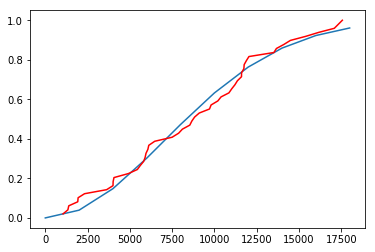

In [33]:
x = np.linspace(1,18000,10)

plt.plot(x,weibull(x,10000))


plt.plot(np.unique(data), ec, color = 'red')

plt.show()

In [34]:
sample = bootstrap(data)
sample.sort()

ex = ecdf(sample)
error_list = []

for i in range(1,len(np.unique(sample))):

    x = sample[i]           
    error_plu = np.abs(weibull(x,theta=10000) - ex[i])
    error_mine = np.abs(weibull(x,theta=10000) - ex[i - 1])
    
    error_list.append(error_plu)
    error_list.append(error_mine)

In [35]:
i = 0

error_all = []
while i < 10:
    sample = bootstrap(data)
    sample.sort()
    ex = ecdf(sample)
    error_list = []
    
    for i in range(1,len(np.unique(sample))):
            x = sample[i]           
            error_plu = np.abs(weibull(x,theta=10000) - ex[i])
            error_mine = np.abs(weibull(x,theta=10000) - ex[i - 1])

            error_list.append(error_plu)
            error_list.append(error_mine)
            #print(np.max(error_list))
            error_all.append(np.max(error_list))
    i += 1

error_all = np.array(error_all)
sum(np.sqrt(len(data))*error_all > 1.35)/len(data)

0.16326530612244897

### scipy.kstest

In [36]:
from scipy.stats import ks_2samp

In [37]:
def dweibull(theta, size = 1000):
    res = np.random.uniform(0, 1, size = size)
    Y = theta*np.sqrt(-np.log(res))
    return Y

In [38]:
x = dweibull(10000,49)

ks_2samp(x,data)

Ks_2sampResult(statistic=0.1428571428571429, pvalue=0.6652290707012116)